In [3]:
# Importing necessary libraries
# General Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# ML library
from sklearn import model_selection
from sklearn import metrics
# Data Balancing Library
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# regression-multiple-methods.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

### Loading Data and Data Summary

In [4]:
algorithms = {
    'Logistic-Regression': LogisticRegression(multi_class='auto',random_state=42, max_iter=2000),
    # 'SVC-Linear': SVC(kernel='linear', probability=True,random_state=42),
    # 'SVC-RBF': SVC(kernel='rbf', probability=True,random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    # 'Neural-Network-5': MLPClassifier(hidden_layer_sizes=[5], max_iter=20000),
    # 'DecisionTree': DecisionTreeClassifier(random_state=42),
    # 'GradientBoosting': GradientBoostingClassifier(random_state=42),
    # 'KNeighbors': KNeighborsClassifier()
}
file_path = '../outputs/features_data_grp_test_1.csv'
np.random.seed(42)
# load the dataset


In [5]:
def trainAndTestWithSampling(X, y, model, model_name):
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42)

  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  y_pred = model.predict(testX)
  # evaluate predictions
  # Accuracy
  print(f'***************************{model_name}********************************')
  print("Accuracy:", accuracy_score(testy, y_pred))
  print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
  print("\nClassification Report:\n", classification_report(testy, y_pred))
  return trainX, testX, trainy, testy

##Program Starting Here!

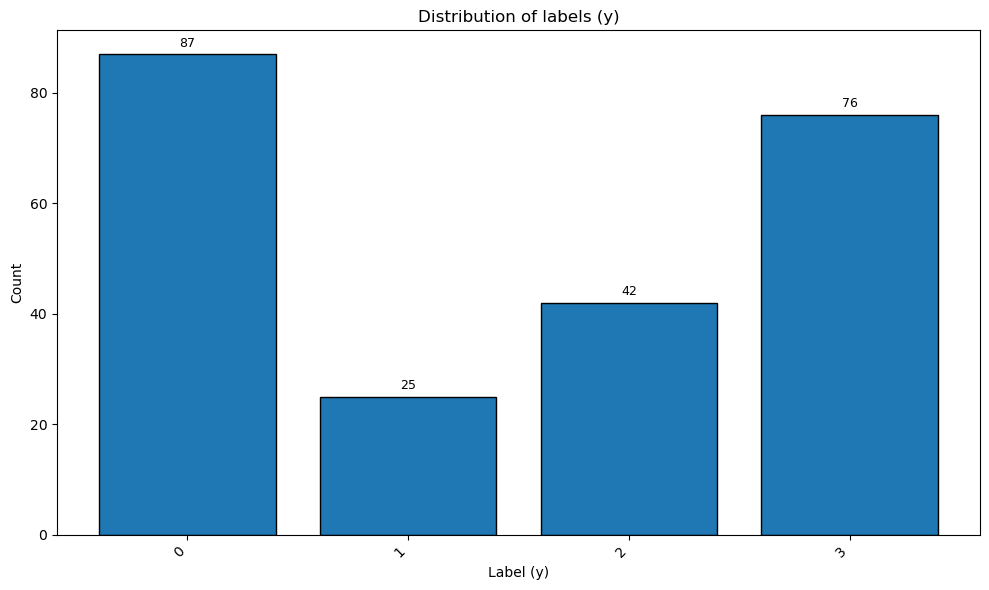

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


***************************Logistic-Regression********************************
Accuracy: 0.6086956521739131

Confusion Metrics
 [[14  0  1  3]
 [ 3  0  0  1]
 [ 5  0  1  1]
 [ 4  0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.78      0.64        18
           1       0.00      0.00      0.00         4
           2       0.50      0.14      0.22         7
           3       0.72      0.76      0.74        17

    accuracy                           0.61        46
   macro avg       0.44      0.42      0.40        46
weighted avg       0.55      0.61      0.56        46



c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***************************RandomForest********************************
Accuracy: 0.717391304347826

Confusion Metrics
 [[16  0  1  1]
 [ 2  0  0  2]
 [ 5  0  2  0]
 [ 1  0  1 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.00      0.00      0.00         4
           2       0.50      0.29      0.36         7
           3       0.83      0.88      0.86        17

    accuracy                           0.72        46
   macro avg       0.50      0.51      0.50        46
weighted avg       0.64      0.72      0.67        46



c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']

counts = df_clean['y'].value_counts().sort_index()   # or .sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(counts.index.astype(str), counts.values, color='tab:blue', edgecolor='k')
plt.xlabel('Label (y)')
plt.ylabel('Count')
plt.title('Distribution of labels (y)')
plt.xticks(rotation=45, ha='right')

# annotate counts on top of each bar
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + max(counts.values)*0.01, f'{int(h)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

for model_name, algorithm in algorithms.items():
    trainX, testX, trainy, testy = trainAndTestWithSampling(X,y,algorithm, model_name)


## PCA Program Starting Here!

In [9]:

def train_and_evaluate_with_pca(X,y,n_pcs_list):
    # Ensure X only contains the features you want to analyze with PCA

    # --- PCA Process ---
    pca_results = pd.DataFrame(columns=['Model', 'Features', 'classification_report'])
    # Step 1: Standardize the data
    # PCA is affected by scale, so standardization (mean=0, variance=1) is crucial.
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Perform PCA
    # We use all components initially to analyze total variance contribution
    pca = PCA(n_components=None) # None keeps all original dimensions as PCs
    pca.fit(X_scaled)

    # Step 3: Extract explained variance ratios
    # The explained_variance_ratio_ attribute provides the percentage of variance 
    # explained by each individual principal component.
    explained_variance = pca.explained_variance_ratio_

    # --- Plotting the Contributions (Bar Chart) ---
    plt.figure(figsize=(10, 6))
    # Create labels for the X-axis (PC1, PC2, PC3, ...)
    pc_labels = [f"PC{i+1}" for i in range(len(explained_variance))]

    # Plotting the bar chart
    plt.bar(pc_labels, explained_variance * 100, color='skyblue', edgecolor='black')
    # Adding labels and title
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage of Explained Variance (%)')
    plt.title('Contribution of Each Principal Component to Total Variance')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')

    for n_pcs in n_pcs_list:
        pca_n = PCA()
        X_pca = pca_n.fit_transform(X_scaled)
        X_pca_subset = X_pca[:, :n_pcs]  # Select the first `n_pcs` PCs
        print(f"\nUsing top {n_pcs} principal components:")
        print(f"Original dimensions: {X_scaled.shape[1]}")
        print(f"Reduced dimensions: {X_pca_subset.shape[1]}")
        np.random.seed(5)
        # split into train/test sets with same class ratio
        trainX, testX, trainy, testy = model_selection.train_test_split(X_pca_subset, y, test_size=0.2,random_state=42)

        for model_name, model in algorithms.items():
            # Train the model
            model.fit(trainX, trainy)
            y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
            print("Accuracy:", accuracy_score(testy, y_pred))
            print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
            print("\nClassification Report:\n", classification_report(testy, y_pred))
            # Store results
            pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
     # Train and evaluate models using original features
    trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in algorithms.items():
        model.fit(trainX, trainy)

        y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
        print("Accuracy:", accuracy_score(testy, y_pred))
        print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
        print("\nClassification Report:\n", classification_report(testy, y_pred))

        # Store results
        pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
    return pca_results
    


Using top 3 principal components:
Original dimensions: 3290
Reduced dimensions: 3
Accuracy: 0.5217391304347826

Confusion Metrics
 [[13  0  0  5]
 [ 2  0  0  2]
 [ 5  0  0  2]
 [ 6  0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         7
           3       0.55      0.65      0.59        17

    accuracy                           0.52        46
   macro avg       0.26      0.34      0.30        46
weighted avg       0.40      0.52      0.45        46

Accuracy: 0.4782608695652174

Confusion Metrics
 [[ 9  1  2  6]
 [ 2  0  1  1]
 [ 4  0  1  2]
 [ 3  0  2 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.00      0.00      0.00         4
           2       0.17      0.14      0.15      

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_clas


Using top 5 principal components:
Original dimensions: 3290
Reduced dimensions: 5
Accuracy: 0.5217391304347826

Confusion Metrics
 [[11  0  0  7]
 [ 2  0  0  2]
 [ 5  0  1  1]
 [ 5  0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.61      0.54        18
           1       0.00      0.00      0.00         4
           2       1.00      0.14      0.25         7
           3       0.55      0.71      0.62        17

    accuracy                           0.52        46
   macro avg       0.51      0.36      0.35        46
weighted avg       0.54      0.52      0.48        46

Accuracy: 0.6521739130434783

Confusion Metrics
 [[12  1  0  5]
 [ 2  0  1  1]
 [ 3  1  3  0]
 [ 1  0  1 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.00      0.00      0.00         4
           2       0.60      0.43      0.50      

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_clas


Using top 10 principal components:
Original dimensions: 3290
Reduced dimensions: 10
Accuracy: 0.5434782608695652

Confusion Metrics
 [[12  0  1  5]
 [ 1  0  0  3]
 [ 5  0  2  0]
 [ 4  1  1 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.67      0.60        18
           1       0.00      0.00      0.00         4
           2       0.50      0.29      0.36         7
           3       0.58      0.65      0.61        17

    accuracy                           0.54        46
   macro avg       0.41      0.40      0.39        46
weighted avg       0.50      0.54      0.52        46

Accuracy: 0.6739130434782609

Confusion Metrics
 [[12  0  1  5]
 [ 1  1  1  1]
 [ 4  0  3  0]
 [ 1  1  0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.50      0.25      0.33         4
           2       0.60      0.43      0.50    

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Using top 15 principal components:
Original dimensions: 3290
Reduced dimensions: 15
Accuracy: 0.6739130434782609

Confusion Metrics
 [[14  1  1  2]
 [ 2  0  0  2]
 [ 4  0  3  0]
 [ 2  1  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70        18
           1       0.00      0.00      0.00         4
           2       0.75      0.43      0.55         7
           3       0.78      0.82      0.80        17

    accuracy                           0.67        46
   macro avg       0.54      0.51      0.51        46
weighted avg       0.65      0.67      0.65        46

Accuracy: 0.6521739130434783

Confusion Metrics
 [[13  0  1  4]
 [ 2  0  1  1]
 [ 4  0  3  0]
 [ 3  0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.72      0.65        18
           1       0.00      0.00      0.00         4
           2       0.60      0.43      0.50    

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_clas

Accuracy: 0.6086956521739131

Confusion Metrics
 [[14  0  1  3]
 [ 3  0  0  1]
 [ 5  0  1  1]
 [ 4  0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.78      0.64        18
           1       0.00      0.00      0.00         4
           2       0.50      0.14      0.22         7
           3       0.72      0.76      0.74        17

    accuracy                           0.61        46
   macro avg       0.44      0.42      0.40        46
weighted avg       0.55      0.61      0.56        46



c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit

Accuracy: 0.717391304347826

Confusion Metrics
 [[16  0  1  1]
 [ 2  0  0  2]
 [ 5  0  2  0]
 [ 1  0  1 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.00      0.00      0.00         4
           2       0.50      0.29      0.36         7
           3       0.83      0.88      0.86        17

    accuracy                           0.72        46
   macro avg       0.50      0.51      0.50        46
weighted avg       0.64      0.72      0.67        46

                 Model Features  \
0  Logistic-Regression    3 PCs   
1         RandomForest    3 PCs   
2  Logistic-Regression    5 PCs   
3         RandomForest    5 PCs   
4  Logistic-Regression   10 PCs   
5         RandomForest   10 PCs   
6  Logistic-Regression   15 PCs   
7         RandomForest   15 PCs   
8  Logistic-Regression   15 PCs   
9         RandomForest   15 PCs   

                               classification

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit

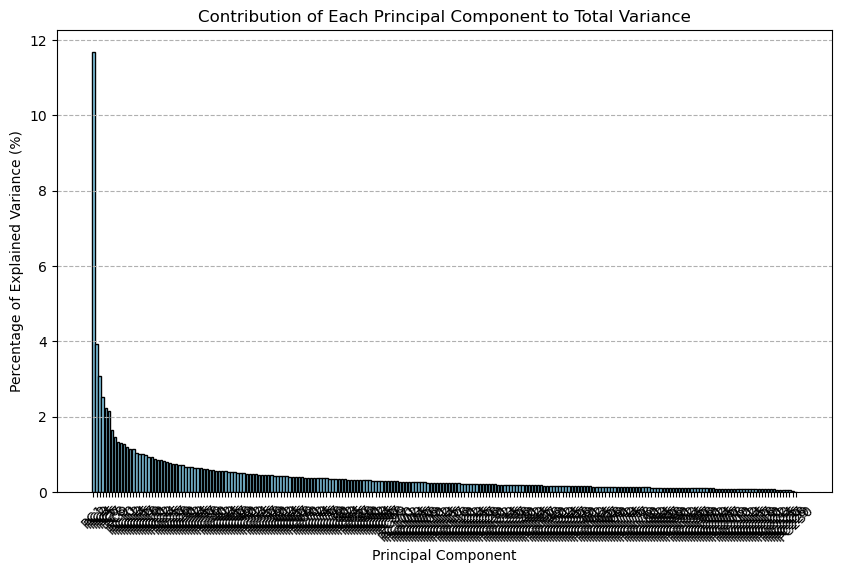

In [10]:
n_pcs_list = [3, 5, 10, 15]
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']
pca_results = train_and_evaluate_with_pca(X,y, n_pcs_list)
print(pca_results)
print("----------------------------------------------------------------\n\n")